In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

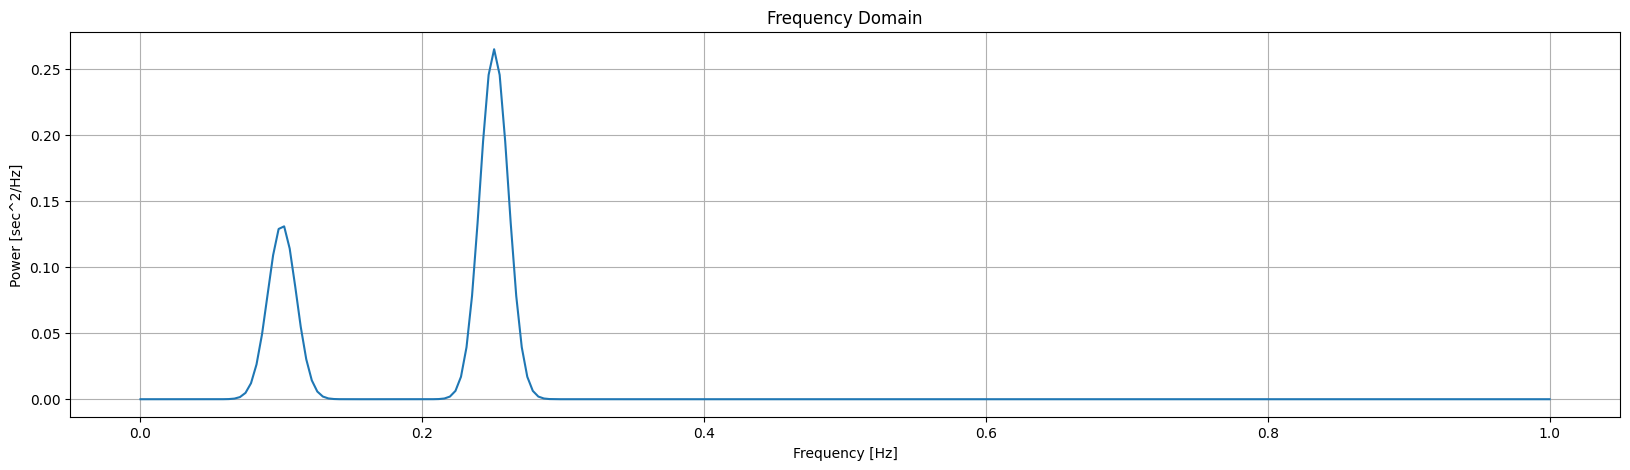

In [2]:
f1 = 0.1
f2 = 0.25

c1 = 0.01
c2 = 0.01

ratio = 0.5
Nrr = 256 # jumlah data RR

magsf = 1.7 / Nrr 

sf = []

for i in range(0, Nrr):
    f = i * 1 / Nrr
    sf1 = ratio * magsf * math.exp(
        -((f - f1)**2) / (2 * c1**2)
    ) / math.sqrt(2 * math.pi * (c1**2))
    sf2 = magsf * math.exp(
        -((f - f2) ** 2) / (2 * (c2**2))
    ) / math.sqrt(2 * math.pi * (c2**2))
    sf.append(sf1 + sf2)

# Generate the frequency axis for plotting
f = np.linspace(0, 1, Nrr)

plt.figure(figsize=(20, 5))
plt.plot(f, sf)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [sec^2/Hz]")
plt.title("Frequency Domain")
plt.grid()
plt.show()


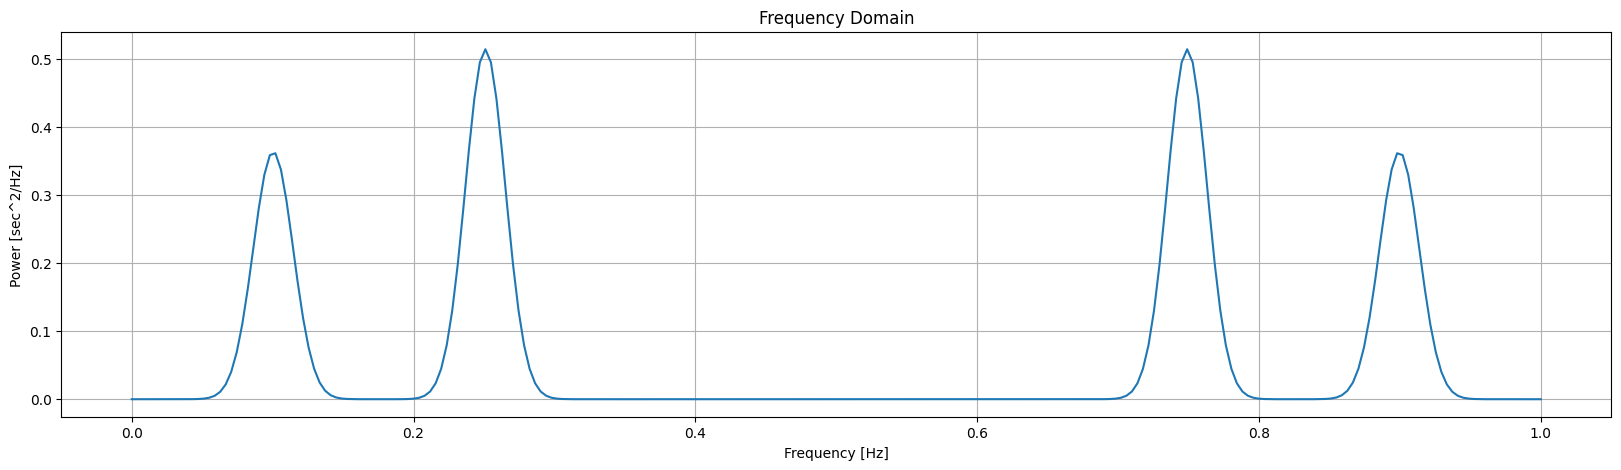

In [3]:
#Mirroring Data
j = 0
sf_mirror = np.zeros(len(sf))
for i in range(Nrr // 2, Nrr):
    sf[i] = sf[Nrr - i - 1]
    j += 1

#Sqrt data 
for i in range(Nrr):
    sf[i] = math.sqrt(sf[i])

for i in range (Nrr):
    sf_mirror[i]=(sf[i])

plt.figure(figsize=(20, 5))
plt.plot(f, sf_mirror)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [sec^2/Hz]")
plt.title("Frequency Domain")
plt.grid()
plt.show()


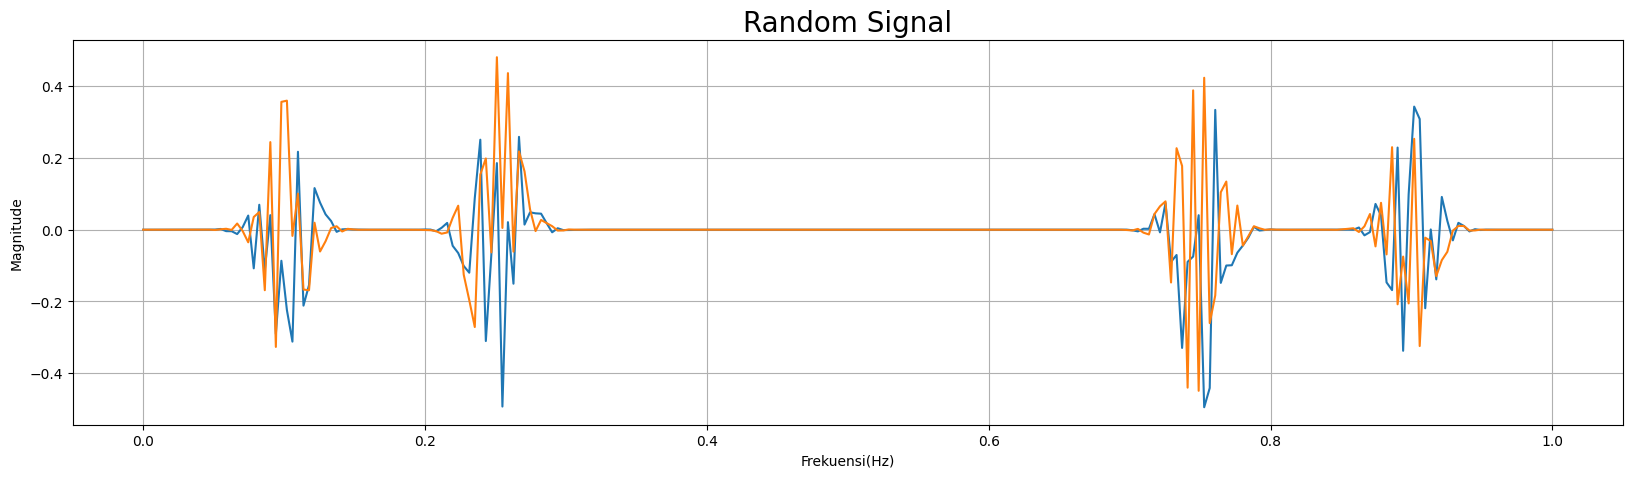

In [4]:
import random
# IDFT
sf_real_idft = np.zeros(Nrr)
sf_imaj_idft = np.zeros(Nrr)
MagIDFT = np.zeros(Nrr) 

#Random signal 
sfre= np.zeros(Nrr)
sftm= np.zeros(Nrr)

for n in range (Nrr):
    sfre[n] = sf[n]*math.cos(2*math.pi*(random.uniform(0.0, 2*math.pi)))
    sftm[n] = sf[n]*math.sin(2*math.pi*(random.uniform(0.0, 2*math.pi)))

#IDFT
for n in range(Nrr):
    for k in range(Nrr):
        sf_real_idft[n] += sfre[k]*math.cos(2*math.pi*k*n/Nrr)
        sf_imaj_idft[n] += sftm[k]*math.sin(2*math.pi*k*n/Nrr)
    MagIDFT[n] = sf_real_idft[n]/Nrr + sf_imaj_idft[n]/Nrr

#Looping 
k =  np.arange (0, Nrr, 1, dtype=int)
n = np.arange (0, Nrr, 1, dtype=int)

#Plotting 
plt.figure(figsize=(20,5))
plt.plot(f,sfre, f, sftm)
plt.title ("Random Signal", fontsize=20)
plt.ylabel("Magnitude", fontsize=10)
plt.xlabel("Frekuensi(Hz)", fontsize=10)
plt.grid()
plt.show()


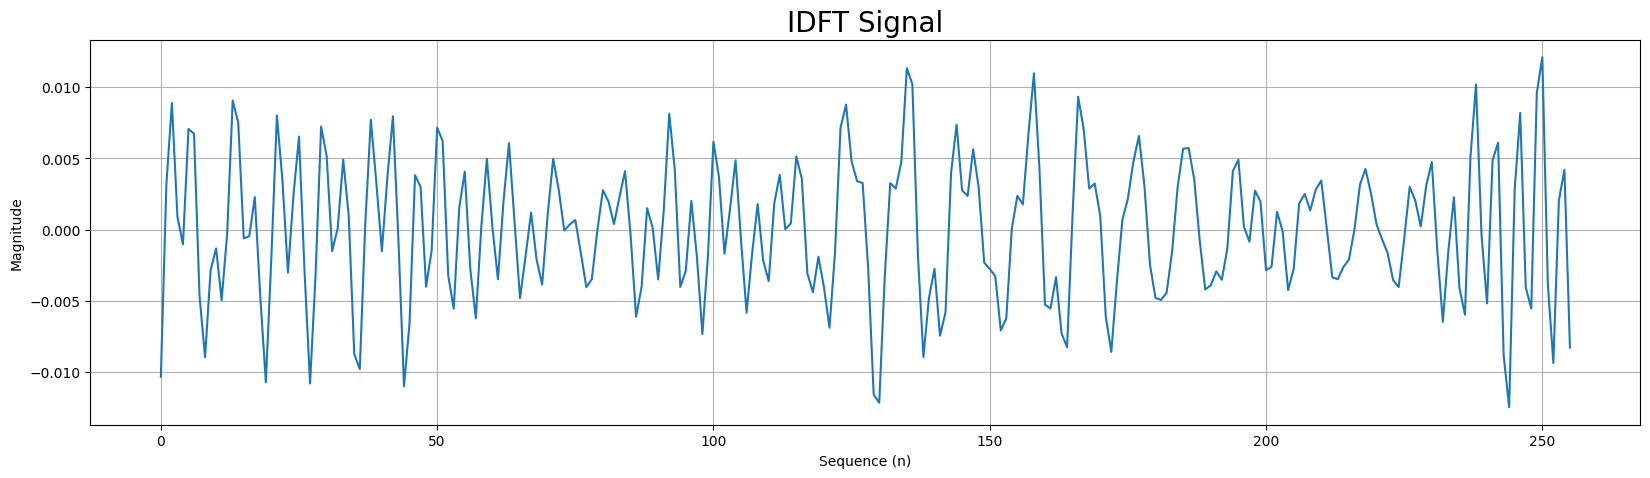

In [5]:
#Plotting 
plt.figure(figsize=(20,5))
plt.plot(k, MagIDFT)
plt.title ("IDFT Signal", fontsize=20)
plt.ylabel("Magnitude", fontsize=10)
plt.xlabel("Sequence (n)", fontsize=10)
plt.grid()
plt.show()

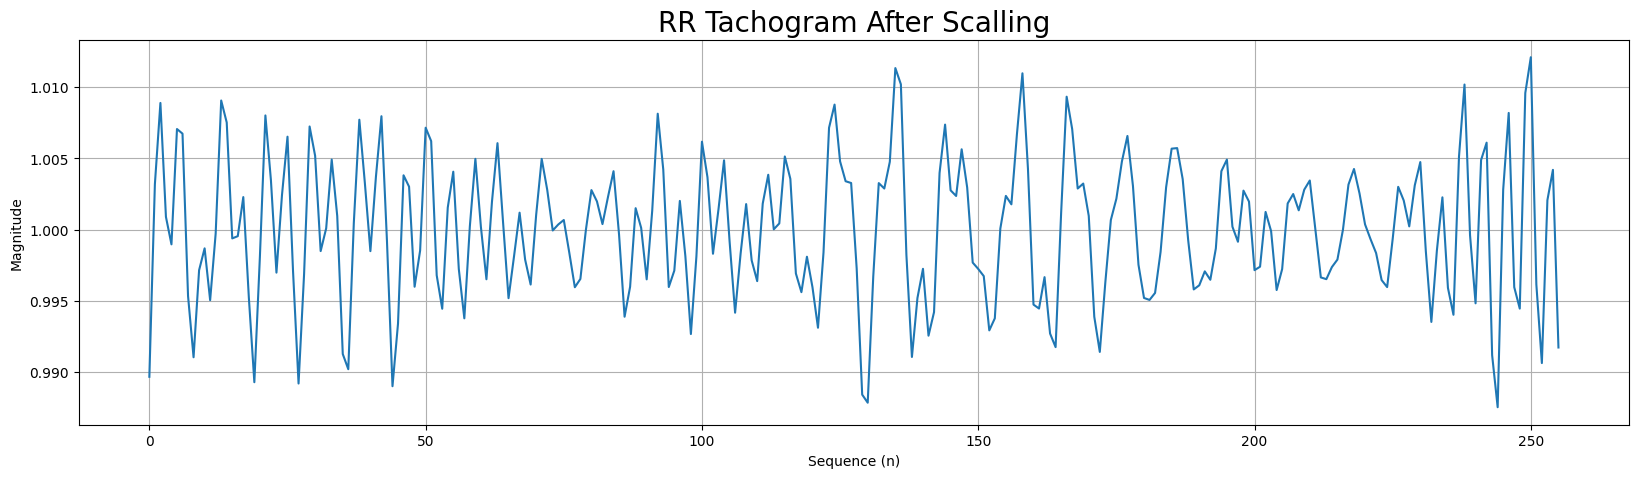

In [6]:
#output RR

h_mean = 60
offset = 60/h_mean
scalling = 1

rr_tachogram = []

for i in range (Nrr):
    rr_tachogram.append((MagIDFT[i]*scalling+offset))

#Plotting 
plt.figure(figsize=(20,5))
plt.plot(k, rr_tachogram)
plt.title ("RR Tachogram After Scalling", fontsize=20)
plt.ylabel("Magnitude", fontsize=10)
plt.xlabel("Sequence (n)", fontsize=10)
plt.grid()
plt.show()

In [7]:
def angfreq(in1):
    i = int(math.floor(in1 / fecg))
    if rr_tachogram[i]==0:
        rr_tachogram[i] = 0.000000000000001
    return ((2*np.pi)/rr_tachogram[int(np.floor(in1/fecg))])
# ---- fungsi modulus untuk dimasukkan ke rumus z dot ---- #
def modulus(in1, in2):
    while in1 >= in2:
        in1 = in1 - in2
    return in1

In [8]:
def ddt(t0, x0, y0, z0, trig, indikator_pvc):
    a0 = 1- math.sqrt((x0*x0)+(y0*y0)) #rumus untuk alpha di papaer
    if trig == 1:
        return a0*x0 - (angfreq(t0)*y0)
    elif trig == 2:
        return a0*y0 + (angfreq(t0)*x0)
    elif trig == 3:
        temp = 0
        zbase = 0.005*math.sin(2*math.pi*f2*t0) #baseline wander
        te = np.arctan2(y0,x0) 
        for i in range (5):
            if indikator_pvc == 0:
                det = ((te - ti[i])%(2 * math.pi))-math.pi # det = delta teta
                det2 = det * det
                temp = temp - (ai[i] * det * math.exp((-0.5 * det2) / (bi[i] * bi[i])))
            else:
                det = ((te - ti_modif[i])%(2 * math.pi))-math.pi # det = delta teta
                det2 = det * det
                temp = temp - (ai_modif[i] * det * math.exp((-0.5 * det2) / (bi_modif[i] * bi_modif[i])))
        temp -= (z0 - zbase)
        return temp


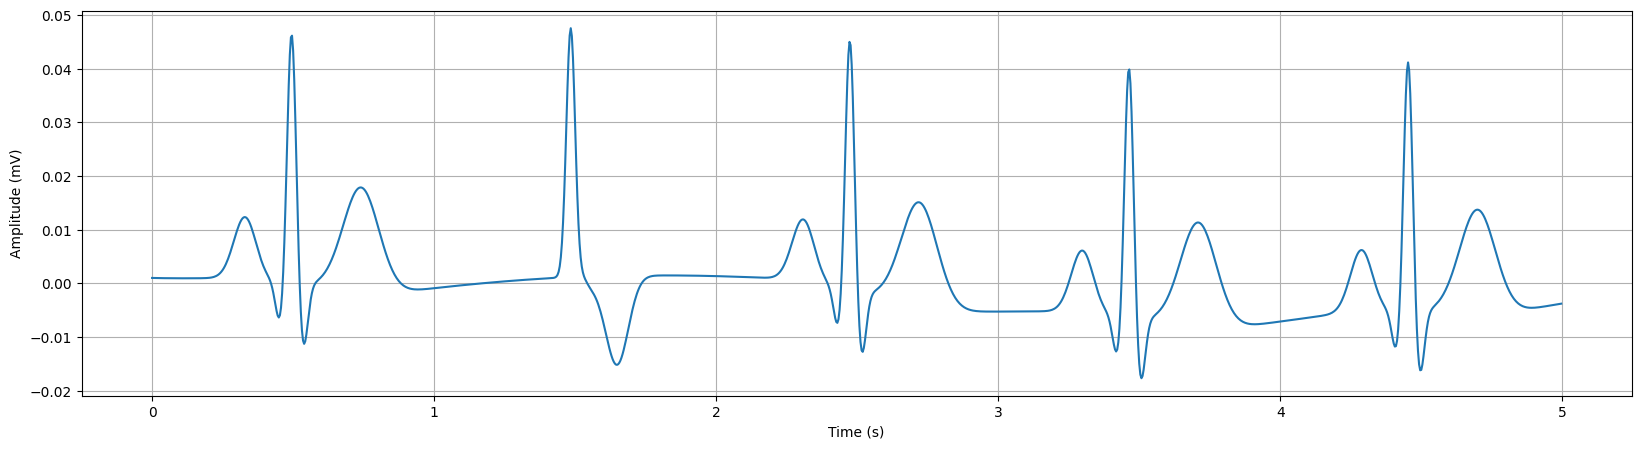

In [15]:
#Set All the morphological Parameter 
fecg = 256
dt = 1/fecg
hr_fact = math.sqrt(h_mean/60) #modulation factor alpha
hr_fact2 = math.sqrt(hr_fact)

#Parameter Teta
ti_p = (-60*math.pi/180)*hr_fact2
ti_q = (-15*math.pi/180)*hr_fact
ti_r = (0*math.pi/180)
ti_s = (15*math.pi/180)*hr_fact
ti_t = (90*math.pi/180)*hr_fact2
ti = [ti_p, ti_q, ti_r, ti_s, ti_t]
#Parameter a
ai_p = 1.2
ai_q = -5
ai_r = 30
ai_s = -7.5
ai_t = 0.75
ai = [ai_p, ai_q, ai_r, ai_s, ai_t]
#Parameter b
bi_p = 0.25*hr_fact2
bi_q = 0.1*hr_fact2
bi_r = 0.1*hr_fact2
bi_s = 0.1*hr_fact2
bi_t = 0.4*hr_fact2
bi = [bi_p, bi_q, bi_r, bi_s, bi_t]

#Modification variabel 
#Parameter Teta
ti_p_modif = (-60*math.pi/180)*hr_fact2
ti_q_modif = (-15*math.pi/180)*hr_fact
ti_r_modif = (0*math.pi/180)
ti_s_modif = (15*math.pi/180)*hr_fact
ti_t_modif = (1*math.pi/3)*hr_fact2
ti_modif = [ti_p_modif, ti_q_modif, ti_r_modif, ti_s_modif, ti_t_modif]
#Parameter a
ai_p_modif = 0
ai_q_modif = 0
ai_r_modif = 30
ai_s_modif = 1
ai_t_modif = -1.6
ai_modif = [ai_p_modif, ai_q_modif, ai_r_modif, ai_s_modif, ai_t_modif]
#Parameter b
bi_p_modif = 0.25*hr_fact2
bi_q_modif = 0.1*hr_fact2
bi_r_modif = 0.1*hr_fact2
bi_s_modif = 0.1*hr_fact2
bi_t_modif = -0.25*hr_fact2
bi_modif = [bi_p_modif, bi_q_modif, bi_r_modif, bi_s_modif, bi_t_modif]

# Inisialisasi kondisi awal
x = np.zeros(Nrr)
y = np.zeros(Nrr)
z = np.zeros(Nrr)
x[0] = 0.1
y[0] = 0
z[0] = 0.001


timev = 0.0
cycle = 5
yt = np.zeros(Nrr)
xt = np.zeros(Nrr)
zt = np.zeros(Nrr)

output = []

pvc_cycle = random.randint(0,cycle-1)
# Inisialisasi series untuk plotting
for j in range (cycle):
    for i in range(Nrr):
        if j==pvc_cycle: 
            xt[i] = x[0]
            yt[i] = y[0]
            zt[i] = z[0]
            # Konstanta 1
            k1x = ddt(timev, x[0], y[0], z[0], 1, 1)
            k1y = ddt(timev, x[0], y[0], z[0], 2, 1)
            k1z = ddt(timev, x[0], y[0], z[0], 3, 1)
            # Konstanta 2
            k2x = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k1x), y[0] + (dt * 0.5 * k1y), z[0] + (dt * 0.5 * k1z), 1, 1)
            k2y = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k1x), y[0] + (dt * 0.5 * k1y), z[0] + (dt * 0.5 * k1z), 2, 1)
            k2z = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k1x), y[0] + (dt * 0.5 * k1y), z[0] + (dt * 0.5 * k1z), 3, 1)
            # Konstanta 3
            k3x = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k2x), y[0] + (dt * 0.5 * k2y), z[0] + (dt * 0.5 * k1z), 1, 1)
            k3y = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k2x), y[0] + (dt * 0.5 * k2y), z[0] + (dt * 0.5 * k1z), 2, 1)
            k3z = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k2x), y[0] + (dt * 0.5 * k2y), z[0] + (dt * 0.5 * k1z), 3, 1)
            # Konstanta 4
            k4x = ddt(timev + dt, x[0] + (k3x * dt), y[0] + (k3y * dt), z[0] + (k3z * dt), 1, 1)
            k4y = ddt(timev + dt, x[0] + (k3x * dt), y[0] + (k3y * dt), z[0] + (k3z * dt), 2, 1)
            k4z = ddt(timev + dt, x[0] + (k3x * dt), y[0] + (k3y * dt), z[0] + (k3z * dt), 3, 1)
            # Hasil Runge-Kutta orde 4
            x[0] += (dt / 6) * (k1x + (2 * k2x) + (2 * k3x) + k4x)
            y[0] += (dt / 6) * (k1y + (2 * k2y) + (2 * k3y) + k4y)
            z[0] += (dt / 6) * (k1z + (2 * k2z) + (2 * k3z) + k4z)
            timev = timev + dt
            output.append(zt[i])
        else: 
            xt[i] = x[0]
            yt[i] = y[0]
            zt[i] = z[0]
            # Konstanta 1
            k1x = ddt(timev, x[0], y[0], z[0], 1, 0)
            k1y = ddt(timev, x[0], y[0], z[0], 2, 0)
            k1z = ddt(timev, x[0], y[0], z[0], 3, 0)
            # Konstanta 2
            k2x = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k1x), y[0] + (dt * 0.5 * k1y), z[0] + (dt * 0.5 * k1z), 1, 0)
            k2y = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k1x), y[0] + (dt * 0.5 * k1y), z[0] + (dt * 0.5 * k1z), 2, 0)
            k2z = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k1x), y[0] + (dt * 0.5 * k1y), z[0] + (dt * 0.5 * k1z), 3, 0)
            # Konstanta 3
            k3x = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k2x), y[0] + (dt * 0.5 * k2y), z[0] + (dt * 0.5 * k1z), 1, 0)
            k3y = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k2x), y[0] + (dt * 0.5 * k2y), z[0] + (dt * 0.5 * k1z), 2, 0)
            k3z = ddt(timev + (dt * 0.5), x[0] + (dt * 0.5 * k2x), y[0] + (dt * 0.5 * k2y), z[0] + (dt * 0.5 * k1z), 3, 0)
            # Konstanta 4
            k4x = ddt(timev + dt, x[0] + (k3x * dt), y[0] + (k3y * dt), z[0] + (k3z * dt), 1, 0)
            k4y = ddt(timev + dt, x[0] + (k3x * dt), y[0] + (k3y * dt), z[0] + (k3z * dt), 2, 0)
            k4z = ddt(timev + dt, x[0] + (k3x * dt), y[0] + (k3y * dt), z[0] + (k3z * dt), 3, 0)
            # Hasil Runge-Kutta orde 4
            x[0] += (dt / 6) * (k1x + (2 * k2x) + (2 * k3x) + k4x)
            y[0] += (dt / 6) * (k1y + (2 * k2y) + (2 * k3y) + k4y)
            z[0] += (dt / 6) * (k1z + (2 * k2z) + (2 * k3z) + k4z)
            timev = timev + dt
            output.append(zt[i])

# Plot hasil
plt.figure(figsize=(20, 5))
i = np.arange (0, len(output), 1)
plt.plot(i/fecg, output)
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()